In [45]:
#importa bibliotecas necessárias
from sklearn.metrics.pairwise import paired_distances
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

#Questão 1a


In [46]:
#amostra de tamanho 10000 com distribuição exponencial de média 1
expo_10000 = np.random.exponential( scale = 1,size = 10000)

#Questão 1b

In [47]:
expo_10000_inversa = []
#amostra de tamanho 10000 uniforme
amostra_uniforme = np.random.rand(1,10000)
for i in range(10000):
  #método da transforma inversa
  X = -math.log(amostra_uniforme[0][i])
  expo_10000_inversa.append(X)

#Questão 1c

[]

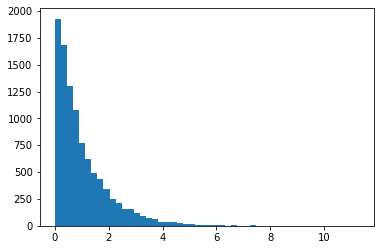

In [48]:
#histograma gerador direto
plt.hist(expo_10000, bins = 50)
plt.plot()



[]

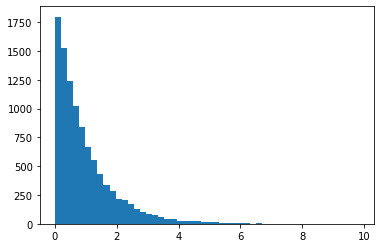

In [49]:
#histograma com a inversa
plt.hist(expo_10000_inversa, bins = 50)
plt.plot()

#Questão 2

In [50]:
#importa base de dados
data = pd.read_csv('/content/drive/MyDrive/MAE0339/CitiByke/202102-citibike-tripdata.csv')
#data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
#transforam as string com datas em datetime
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])
#tempo de uma corrida em segundos
data['run_time'] = (data['ended_at']- data['started_at']).dt.total_seconds()

#Questão 2a

In [52]:
tempo_minimo = (0.35/16)*60*60
#exclui linhas com tempo abaixo do minimo
data.drop(data.loc[(data['run_time'] <= tempo_minimo)].index, inplace=True)

#Questão 2b

In [53]:
#exclui linhas com tempo negativo e os tempos maiores que 60 min
data.drop(data.loc[(data['run_time'] < 0) & (data['run_time']>60*60)].index, inplace=True)


#Questão 2c

[]

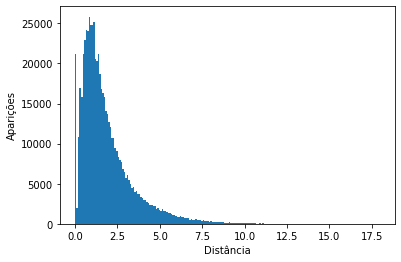

In [54]:
#exclui os valores nulos
data.dropna(inplace = True)
#transforma as latitudes em radianos
data['start_lat'] = np.radians(data['start_lat'])
data['end_lat'] = np.radians(data['end_lat'])
#transforma as longitudes em radianos
data['start_lng'] = np.radians(data['start_lng'])
data['end_lng'] = np.radians(data['end_lng'])
#calcula a distancia entre os pontos pela fórmula de haversine
data['dif_media_lat'] =  (data['end_lat'] - data['start_lat'])/2
data['dif_media_lng'] = (data['end_lng'] - data['start_lng'])/2
data['run_distance'] = 2*6371*np.arcsin(np.sqrt((np.sin(data['dif_media_lat']))**2 + np.cos(data['start_lat'])*np.cos(data['end_lat'])*(np.sin(data['dif_media_lng']))**2))
#plota o histograma da distancia
plt.hist(data['run_distance'],bins=200)
#titulo dos eixos
plt.xlabel('Distância')
plt.ylabel('Aparições')
plt.plot()


#Questão 2d

In [55]:
#estações de chegada e partida iguais
p = len(data[data['end_station_id'] == data['start_station_id']])/len(data)
print('p = %s'%p)

p = 0.014071759303366934


#Questão 2e

In [56]:
media = data[data['end_station_id'] != data['start_station_id']]['run_distance'].mean()
print('Média da distância percorrida (km) tirando os nulos: %s'%media)

Média da distância percorrida (km) tirando os nulos: 1.8770679170067623


#Questão 2f

In [57]:
#va aleatoria
X = []
#amostra de tamanho 10000 uniforme
amostra_uniforme = np.random.rand(1,10000)
for i in range(10000):
  if amostra_uniforme[0][i] <= p:
    X.append(0)
  else:
    X.append(random.expovariate(1/media))


[]

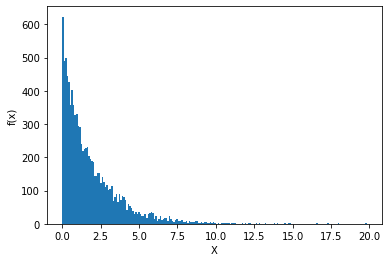

In [58]:
#histograma da simulaação
plt.hist(X,bins=200)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.plot()

[]

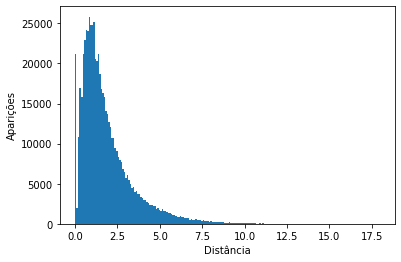

In [59]:
#histograma original
#plota o histograma da distancia
plt.hist(data['run_distance'],bins=200)
#titulo dos eixos
plt.xlabel('Distância')
plt.ylabel('Aparições')
plt.plot()

In [60]:
#o modelo exponencial é util no geral, mas para pontos adiante do zero e menores que 0.02 a aproximação não é legal, então talvez seja util utilizar 
#uma distribuição qui-quadrado, por exemplo.